In [2]:
import assessmentModule as amod
import glob
import matplotlib.pyplot as plt
import numpy as np
import operator
import os
import pandas as pd
%matplotlib inline

In [3]:
def smooth(x, n):
    """Return moving average for period n."""
    w = np.ones((n, )) / n
    return np.convolve(x, w, mode='valid')

In [6]:
home_dir = '/Users/todd/code'
data_dir = os.path.join(home_dir,
                        'AnalysisTools/DataScience/blog/smo2_variation')
os.chdir(data_dir)

In [7]:
column_names = ['c0', 'c1', 'c2', 'c3', 'ts',
                'c5', 'c6', 'HR', 'c8', 'c9',
                'SmO2', 'c11', 'c12', 'power', 'c14']

In [8]:
cd ../../data/caldwell_shine/

/Users/todd/code/AnalysisTools/DataScience/data/caldwell_shine


In [9]:
files = []
with open('caldwell_shine_key.txt', 'r') as fn:
    files = fn.readlines()
files = [i.strip('\n') for i in files]

In [10]:
data = {}
for i in files:
    data[i] = pd.read_csv(i + '.csv', skiprows=5, names=column_names)

72.59314185228611 3.5539119427123307
70.78625047874381 3.1639671731654495
69.14771317829447 2.829628903510633
72.4784215784218 3.2387396133740602


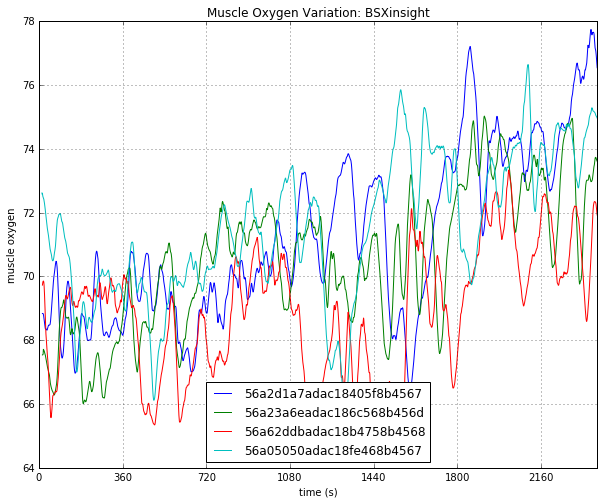

In [23]:
for key in data.keys():
    ts = data[key]['SmO2']
    print(ts.mean(), ts.std())
    #plt.plot(smooth(ts, 30) / ts.max(), label=key)
    plt.plot(smooth(ts, 30), label=key)
plt.grid()
plt.title('Muscle Oxygen Variation: BSXinsight')
plt.ylabel('muscle oxygen')
plt.xlabel('time (s)')
plt.tick_params(axis='y',
                which='both',
                left='on',
                right='off',
                labelleft='on')
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['legend.loc'] = 'lower center'
plt.xlim(xmin=0, xmax=2400)
plt.ylim(ymin=64, ymax=78)
plt.xticks(np.arange(0, 2400, 360))
#plt.axvspan(0, 380, color='g', alpha=0.25, linewidth=0)
#plt.axvspan(380, 500, color='y', alpha=0.25, linewidth=0)
#plt.axvspan(1120, 1440, color='r', alpha=0.25, linewidth=0)
#plt.axvline(x=time_to_LT[i], color='r',
#            linestyle='dashed', label='LT')
plt.legend()
plt.show()  # Have a look at the data. Turn off when using savefig.
#plt.savefig('SmO2_variation.png')  # Turn off when using show.

In [29]:
for key in data.keys():
    print(data[key]['SmO2'][20])

69.2
67.6
69.6
72.2
